# Integrals

If we have a function $f(x)$ which is well-defined for some $a \le x \le b $, its integral over those two values is defined as

$$\int_a^b dx\; f(x) \;=\; \lim_{N \rightarrow 0} \, \Delta x_N\, \sum_{n=0}^{N} f(a + n\Delta x_N), \quad\mathrm{where}\;\; \Delta x_N \equiv \left(\frac{b-a}{N}\right).$$

This is called a **definite integral**, and it represents the area under the graph of $f(x)$ in the region between $x=a$ and $x=b$, as shown in the figure below.  The interval between two fixed points, $a$ and $b$, is divided into $N$ segments, of length $(b-a)/N$ each.  Each term in the sum represents the area of a rectangle. As $N\rightarrow \infty$, the sum converges to the area under the curve.

<img src="img/definite_integral.png" alt="Figure of a definite integral." width=75%>

For the purposes of dimensional analysis, an integral has the units of the integrand times the units of $x$. This is easy to remember: just treat $dx$ as a multiplicative factor with units of $x$.

From the defintion of the [derivative](derivatives.ipynb), we can show that

$$ \frac{d}{db} \left[\int_a^b dx\; f(x)\right] = f(b), \quad \frac{d}{da} \left[\int_a^b dx\; f(x)\right] = -f(a).$$

Hence, an integral is the "inverse" of a derivative operation.  Notice that the right-hand-side of the first equation does not involve $a$, the opposite integral limit.  Based on this, we can define an **indefinite integral**, or **antiderivative**:

$$\int^x dx' f(x') \equiv F(x) \;\;\mathrm{such}\;\mathrm{that}\;\; \frac{d}{dx}F(x) = f(x).$$

Unlike a definite integral, an antiderivative is not unique, but is only defined up to an additive constant, called an **integration constant**.

As you may recall, integration is much harder than differentiation.  Once you know how to differentiate a few special functions, differentiating some combination of those functions just involves a straightforward (though possibly tedious) application of [composition rules](derivatives.ipynb#composition_rules).  By contrast, there is no general systematic procedure for doing an integral symbolically.  This is called the [antiderivative problem](http://en.wikipedia.org/wiki/Antiderivative).  Integration often involves making a series of inspired choices, like guessing a solution and checking if its derivative gives the desired integral expression. Some of the more commonly-used tricks are summarized below.

<a name="integration_by_parts"></a>
## Integration by parts

If the integrand consists of two factors, and you know the antiderivative of one of the factors, you can "integrate by parts" to shift the derivative onto the other factor.  Specifically,

$$\int_a^b dx \; f(x) \, \frac{dg}{dx} \;=\; \Big[\,f(x)\, g(x)\,\Big]_a^b - \int_a^b \frac{df}{dx}\, g(x). $$

The first term on the right hand side is a constant denoting $[f(a)g(a) - f(b)g(b)]$.  The second term is an integral, which might be easier to do than the original integral.  Judicious use of integration by parts is a key step for solving many integrals.  For example, consider

$$\int_a^b dx\; x \, e^{\gamma x}.$$

The integrand consists of two factors, $x$ and $e^{\gamma x}$; we happen to know the antiderivative of both factors.  Integrating by parts lets us replace one of these factors with its antiderivative, while applying an additional derivative on the other factor.  The smart thing to do is to apply the derivative on the $x$ factor, and the antiderivative on the $e^{\gamma x}$. If we do this, the first factor turns into unity:

$$\begin{align}\int_a^b dx\; x\, e^{\gamma x} \;&=\; \left[\;x\, \frac{e^{\gamma x}}{\gamma}\, \right]_a^b - \int_a^b dx\; \frac{e^{\gamma x}}{\gamma} \\&=\; \left[\;x\, \frac{e^{\gamma x}}{\gamma} - \frac{e^{\gamma x}}{\gamma^2} \,\right]_a^b.\end{align}$$

Whenever we finish doing an integral, it is good practice to double-check the result by making sure the dimensions match up.  Note that $\gamma$ has units of inverse $x$, so the integral on the left-hand side has units of $x^2$.  The solution on the right hand side has two terms, with units $x/\gamma$ and $1/\gamma^2$; both of these are equivalent to units of $x^2$, which is what we need!

## Change of variables

Another useful technique for solving integrals is to change variables.  Consider the integral

$$\int_0^\infty \frac{dx}{x^2 + 1}.$$

We can solve this by making a change of variables $x = \tan(u)$.  This involves (i) replacing all occurences of $x$ in the integrand with $\tan(u)$, (ii) replacing the integral limits, and (iii) replacing $dx$ with $(dx/du) \, du = 1/[\cos(u)]^2 du$:

$$\begin{align}\int_0^\infty \frac{dx}{x^2 + 1} &= \int_0^{\pi/2} \frac{1}{[\tan(u)]^2 + 1} \cdot \frac{1}{[\cos(u)]^2} \; du \\ &= \int_0^{\pi/2} \frac{1}{[\sin(u)]^2 + [\cos(u)]^2} \; du\end{align}.$$

Due to the [[Mathematical functions#Trigonometric functions|Pythagorean theorem]], the integrand reduces to 1, so

$$\int_0^\infty \frac{dx}{x^2 + 1} = \int_0^{\pi/2} du = \frac{\pi}{2}.$$

Clearly, this technique often requires some cleverness and/or trial-and-error in choosing the right change of variables.

<a name="gaussian_integral"></a>
## The Gaussian integral

Here's a famous integral:

$$\int_{-\infty}^\infty \; e^{-\gamma x^2} \; dx.$$

The integrand is called a Gaussian, or "bell curve", and is plotted below. The definite integral is a function of the parameter $\gamma$; the larger the value of $\gamma$, the more narrowly-peaked the curve.

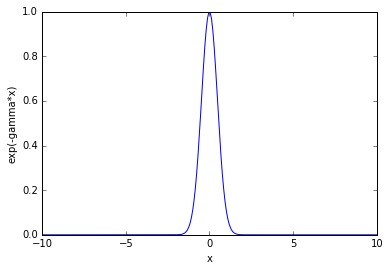

In [10]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, exp
import matplotlib.pyplot as plt

x = linspace(-10, 10, 250)
gmin, gmax, gstep, gval = 0.2, 4., 0.2, 1.

def plot_exp(gamm):
    plt.plot(x, exp(-gamm*x*x))
    plt.xlabel('x')
    plt.ylabel('exp(-gamma*x)')
    plt.show()

interact(plot_exp,gamm=FloatSlider(min=gmin, max=gmax, step=gstep, value=gval, continuous_update=False));


The integral was solved by [Carl Friedrich Gauss](http://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) in a particularly brilliant way.  Let $I(\gamma)$ denote the value of the integral.  Then $I^2$ is just two independent copies of the integral, multiplied together:

$$I^2(\gamma) = \left[\int_{-\infty}^\infty \; e^{-\gamma x^2} \; dx\right] \times \left[\int_{-\infty}^\infty \; e^{-\gamma y^2} \; dy\right].$$

Note that in the second integral, we have changed the "dummy" label $x$ (the integration variable) into $y$, to avoid ambiguity.  Now, this becomes a two-dimensional integral, taken over the entire 2D plane:

$$I^2(\gamma) = \int_{-\infty}^\infty dx\, \int_{-\infty}^\infty dy \; e^{-\gamma (x^2+y^2)}.$$

Next, we change from Cartesian to polar coordinates:

$$I^2(\gamma) = \int_{0}^\infty dr\, r \int_{0}^{2\pi} d\phi \; e^{-\gamma r^2} = \left[ \int_{0}^\infty dr\, r \, e^{-\gamma r^2}\right] \times \left[\int_{0}^{2\pi} d\phi \right] = \frac{1}{2\gamma} \cdot 2\pi.$$

Now, by taking the square root we arrive at the result

$$I(\gamma) = \int_{-\infty}^\infty \; e^{-\gamma x^2} \; dx = \sqrt{\frac{\pi}{\gamma}}.$$

One very interesting thing to notice about this result is that it relates the two transcendental constants $e = 2.7182818285\dots$ and $\pi = 3.141592654\dots$, by means of an integral.  The appearance of $\pi$ can be traced back to the use of polar coordinates to solve the integral.  (Also, when studying the [gamma function](gamma_function.ipynb), one comes across the fact that $\Gamma(1/2) = \pi$, which is a very closely related result which likewise relates $e$ [which is incorporated into the definition of the gamma function] and $\pi$.)

## Differentiating under the integral sign

In the previous section, we noted that if an integrand contains a parameter (denoted $\gamma$) which is independent of the integration variable (denoted $x$), then the definite integral can itself be regarded as a function of $\gamma$.  It can then be shown that taking the derivative of the definite integral with respect to $\gamma$ is equivalent to taking the ''partial derivative'' of the integrand:

$$\frac{d}{d\gamma} \, \left[\int_a^b dx\; f(x,\gamma)\right] = \int_a^b dx \; \frac{\partial f}{\partial \gamma}(x,\gamma).$$

This is called "differentiating under the integral sign", and was originally invented by Gottfried Wilhelm Leibniz, one of the inventors of calculus.  It can be applied as a technique for solving integrals, which was popularized by [Richard Feynman](https://en.wikipedia.org/wiki/Richard_Feynman) in his book [*Surely You're Joking, Mr. Feynman!*](https://en.wikipedia.org/wiki/Surely_You%27re_Joking,_Mr._Feynman!).

Given a definite integral $I_0$, the technique proceeds as follows: (i) come up with a way to generalize the integrand, by introducing a parameter $\gamma$, such that the generalized integral becomes a function $I(\gamma)$ which reduces to the original integral $I_0$ for a particular parameter value, say $\gamma = \gamma_0$.  Then, (ii) differentiate under the integral sign.  If you have chosen the generalization right, the resulting integral will be easier to solve, so (iii) solve the integral to obtain $I'(\gamma)$.  Finally, (iv) integrate this over $\gamma$ to obtain the desired integral $I(\gamma)$, and evaluate it at $\gamma_0$ to obtain the desired integral $I_0$.

An example will make the above procedure clearer.  Consider the integral

$$\int_{0}^\infty dx \; \frac{\sin(x)}{x}.$$

First, (i) we generalize the integral as follows (we'll soon see why):

$$I(\gamma) = \int_{0}^\infty dx \; \frac{\sin(x)}{x}\, e^{-\gamma x}.$$

The desired integral is $I(0)$.  Next, (ii) differentiating under the integral gives

$$I'(\gamma) = - \int_{0}^\infty dx \; \sin(x)\, e^{-\gamma x}.$$

Taking the partial derivative of the integrand with respect to $\gamma$ brought down a factor of $-x$, cancelling out the troublesome denominator.  Now, (iii) we solve the new integral, which can be done by integrating by parts twice:

$$I'(\gamma) = \left[\cos(x)\,e^{-\gamma x}\right]_0^\infty + \gamma \int_{0}^\infty dx \; \cos(x)\, e^{-\gamma x}.$$
$$= -1 + \gamma \left[\sin(x)\,e^{-\gamma x}\right]_0^\infty + \gamma^2 \int_{0}^\infty dx \; \sin(x)\, e^{-\gamma x}.$$
$$= -1 - \gamma^2 I'(\gamma).$$

Hence,

$$I'(\gamma) = - \frac{1}{1+\gamma^2}.$$

(iv) We now have to integrate this over $\gamma$, but we already know how to do that [[#Change of variables|from the above discussion]].  The result is

$$I(\gamma) = A - \tan^{-1}(\gamma),$$

where $A$ is a constant of integration. When $\gamma \rightarrow \infty$, the integral must vanish, which implies that $A = \tan^{-1}(+\infty) = \pi/2$.  Finally, we arrive at the result

$$\int_{0}^\infty dx \; \frac{\sin(x)}{x} = I(0) = \frac{\pi}{2}.$$

When we discuss [contour integration](contour_integration.ipynb), we will see a more straightforward way to do this integral.

## Exercises

<ol><li>Consider the step function<br/>$$\Theta(x) = \left\{\begin{array}{ll} 1, &\;\;\;\textrm{for} \; x \ge 0\\ 0,&\;\;\; \textrm{otherwise.}\end{array}\right.$$<br/>Write down an expression for the antiderivative of $\Theta(x)$, and sketch its graph.
</li>
<li>Show that<br/>$$\int_0^{2\pi} dx\, [\sin(x)]^2 = \int_0^{2\pi} dx\, [\cos(x)]^2 = \pi.$$</li>
<!-- <li>Derive the following "moments" of the Gaussian integral:<br/>&nbsp;&nbsp;&nbsp;$\int_{-\infty}^{\infty} dx\; x^2\,e^{-\gamma x^2} = \frac{\sqrt{\pi}}{2\gamma^{3/2}}$<br/>&nbsp;&nbsp;&nbsp;$\int_{-\infty}^{\infty} dx\; x^4\,e^{-\gamma x^2} = \frac{3\sqrt{\pi}}{4\gamma^{5/2}}.$<br/>Then derive the general expression for $\int_{-\infty}^{\infty} dx\; x^{n}\,e^{-\gamma x^2}.$</li>
-->
<li>Calculate the following definite integrals:<ol style="list-style-type:lower-alpha"><li>$\displaystyle\int_{0}^\pi dx\; x^2 \sin(2x)$</li><li>$\displaystyle\int_{1}^\alpha dx\; x \ln(x)$</li><li>$\displaystyle\int_0^\infty dx\;e^{-\gamma x} \, \cos(x)$</li><li>$\displaystyle\int_0^\infty dx\;e^{-\gamma x} \, x \cos(x)$</li>
<li>$\displaystyle\int_{-\infty}^\infty dx\;e^{-\gamma |x|}$</li>
</ol></li>
<li>By differentiating under the integral, solve<br/>$$\int_0^1 dx\; \frac{x^2-1}{\ln(x)}.$$<br/>Hint: to generalize the integral, replace $x^2$ in the numerator with $x^\gamma$.</li>
</ol>
